In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale

In [ ]:
j_training = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ENTRENAR4.csv",sep=',')

y_train=j_training['averageRating']

X_train=j_training[['numVotes','budget','budget_real','budget_dif','movie','video','tvSeries','tvMovie','tvEpisode','Action','Adventure','Animation','Crime','Drama','Adult','Comedy','Romance','Short','Mystery','Documentary','Music','Reality_TV','Horror','Thriller','es_director_malo','es_director_piola']]

# 'disney','warner','columbia','bbc','fox','mgm','paramount','universal','weinstein','marvel',
from math import *
# X_train['budget_square'] = X_train['budget'].astype(int)**2
# X_train['budget_dif_square'] = X_train['budget_dif'].astype(int)**2
# X_train['budget_real_square'] = X_train['budget_real'].astype(int)**2
# X_train['numVotes_square'] = X_train['numVotes'].astype(int)**2
# X_train['budget_square'] = scale(X_train['budget_square'])
# X_train['budget'] = scale(X_train['budget'])
# X_train['budget_real'] = scale(X_train['budget_real'])
# X_train['numVotes'] = scale(X_train['numVotes'])
#escalar es malo para el modelo que estamos entrenando
# X_train

In [ ]:
j_testing = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TESTEAR4.csv",sep=',')

# y_test=j_testing['averageRating'] #descomentar luego

X_test=j_testing[['numVotes','budget','budget_real','budget_dif','movie','video','tvSeries','tvMovie','tvEpisode','Action','Adventure','Animation','Crime','Drama','Adult','Comedy','Romance','Short','Mystery','Documentary','Music','Reality_TV','Horror','Thriller','es_director_malo','es_director_piola']]

# 'disney','warner','columbia','bbc','fox','mgm','paramount','universal','weinstein','marvel',

# X_test['budget_square'] = X_test['budget'].astype(int)**2
# X_test['budget_dif_square'] = X_test['budget_dif'].astype(int)**2
# X_test['budget_real_square'] = X_test['budget_real'].astype(int)**2
# X_test['numVotes_square'] = X_train['numVotes'].astype(int)**2
# X_test['budget_square'] = scale(X_test['budget_square'])
# X_test['budget'] = scale(X_test['budget'])
# X_test['budget_real'] = scale(X_test['budget_real'])
# X_test['numVotes'] = scale(X_test['numVotes'])
#escalar es malo para el modelo que estamos usando
# X_test


In [ ]:
forest = RandomForestRegressor(n_estimators=250,max_depth=80,max_leaf_nodes=10000,oob_score=True,min_samples_split=12) # 
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=80, max_features='auto', max_leaf_nodes=10000,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=12, min_weight_fraction_leaf=0.0,
                      n_estimators=250, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred=forest.predict(X_test)
pd.DataFrame(y_pred).to_csv('predicciones_ultimo.csv')
#0.3523553407185297 con 4 sin escalar
#0.35235016491917814 con depth 80 nodes 10000

In [ ]:
from matplotlib import pyplot as plt


Text(0.5, 0, 'Random Forest Feature Importance')

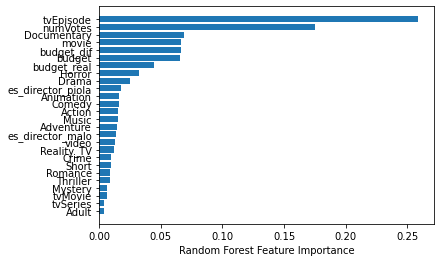

In [ ]:
sorted_idx = forest.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], forest.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")


In [ ]:
extratree = ExtraTreesRegressor(max_depth=100,max_leaf_nodes=10000,bootstrap=True,oob_score=True, min_samples_split=12)
extratree.fit(X_train,y_train)

ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                    max_depth=100, max_features='auto', max_leaf_nodes=10000,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=12, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=True,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred_extra=extratree.predict(X_test)
r2_score(y_test,y_pred_extra)

0.3463686699237244

In [ ]:
import xgboost as xgb

data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.2,
                max_depth = 80, alpha = 10, n_estimators = 150)
xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=80, min_child_weight=1, missing=None, n_estimators=150,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
predsXG = xg_reg.predict(X_test)


0.3021341854836369

In [ ]:
r2_score(y_test,predsXG)
# mean_absolute_error(y_test,predsXG)

0.3021341854836369

In [ ]:
forest2 = RandomForestRegressor() # 
forest2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred2=forest2.predict(X_test)
r2_score(y_test,y_pred2)

0.2849875381259984

In [ ]:
# pd.DataFrame(predicciones_finales).to_csv('predicciones_finales.csv')